In [1]:
import numpy as np
import os
from netCDF4 import Dataset
from skimage.measure import block_reduce

import matplotlib.pyplot as plt

In [2]:
import os, sys
module_path = os.path.abspath(os.path.join('../src/'))
sys.path.append(module_path)
from visuals import *
from pdisco import *

In [3]:
matplotlib.use("TkAgg")
%matplotlib inline

In [4]:
turb_field = np.load("./turb_small.npy")

first try the running to code as is below, if memory is an issue try commenting out and running the code block below

if it is still too large, try setting `block_size=(1,4,4)`

In [5]:
# turb_field = block_reduce(turb_field, block_size=(1,2,2), func=np.mean) # do a 2x2 mean pooling reduction

Note that we are not concerned with counting vortices here, so we *will* distinguish positive and negative vortices, and we will also use only three local causal state segmentation classes; one for background, one for positive, and one for negative vortices

In [6]:
np.shape(turb_field)

(50, 640, 640)

In [7]:
# Initialize parameters for pipeline
p_depth = 3
f_depth = 1
c = 1
K_past = 3
K_future = 10
decay_type='spacetime'
p_decay = 0.05
f_decay = 0.0

In [8]:
past_params = {'nClusters':K_past, 'maxIterations':200}
future_params = {'nClusters':K_future, 'maxIterations':200}
p_i_params = {'nClusters':K_past, 'method':'randomDense', 'distributed': False}
f_i_params = {'nClusters':K_future, 'method':'randomDense', 'distributed': False}

In [9]:
model = DiscoReconstructor(p_depth, f_depth, c, distributed=False)

In [10]:
model.extract(turb_field, boundary_condition='periodic')

In [11]:
model.kmeans_lightcones(past_params, 
                        future_params, 
                        decay_type=decay_type, 
                        past_decay=p_decay, 
                        future_decay=f_decay, 
                        past_init_params=p_i_params, 
                        future_init_params=f_i_params,)

In [12]:
model.reconstruct_morphs()

In [13]:
model.reconstruct_states(chi_squared)

In [14]:
model.causal_filter()

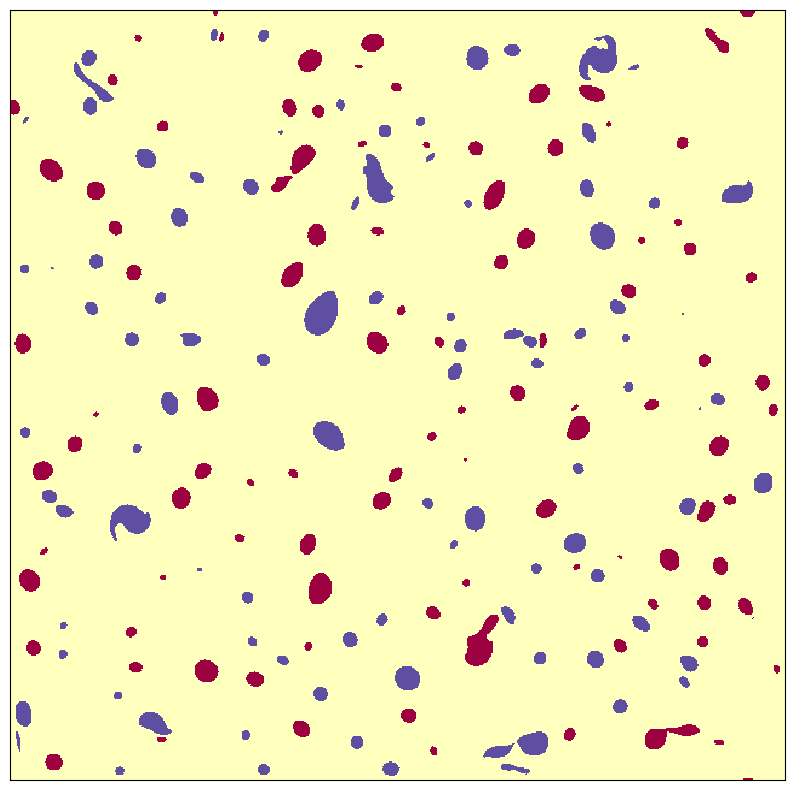

In [15]:
diagram(model.state_field[10], cmap=plt.cm.Spectral, ticks=False, size=10)

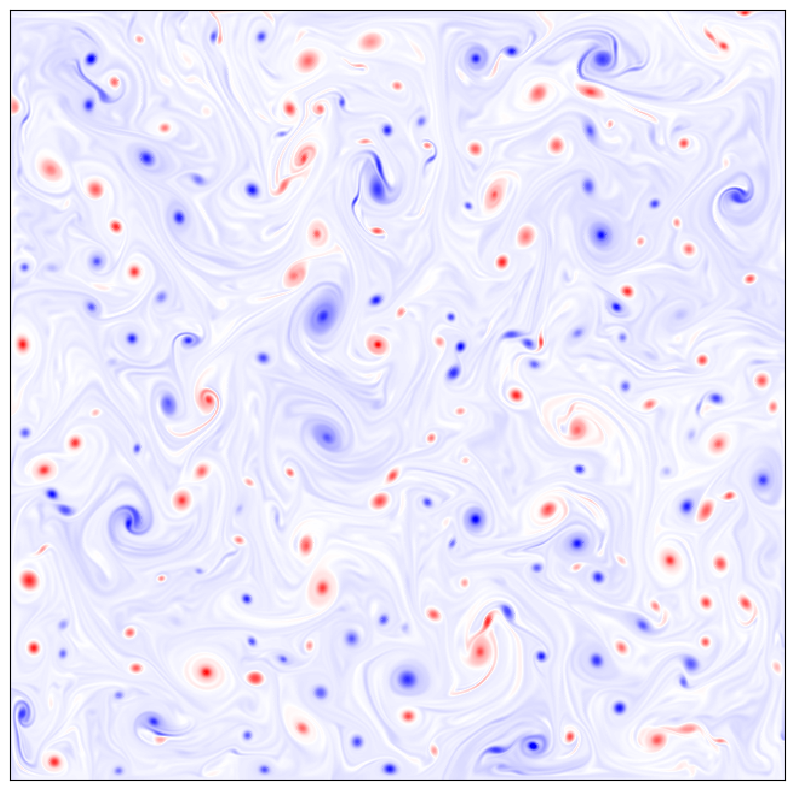

In [16]:
diagram(-1*turb_field[10+p_depth], cmap=plt.cm.bwr, vmin=-0.7, vmax=0.8, ticks=False, size=10)